# Введение

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. <br>

Нам необходимо установить параметры, определяющие рыночную стоимость квартиры.
Для этого нам необходимо установить как на стоимость квартиры влияет:
- общая площадь
- количество комнат
- этаж
- расстояние до центра
- высота потолков


**Описание данных:**

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении
    


# Открываем и изучаем таблицу

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
# приведем название столбца к общему виду
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [7]:
# проверим наличие дубликатов
df.duplicated().sum()

0

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Присутствуют пропуски в столбцах:** 
- ceiling_height,
- floors_total,
- living_area,
- is_apartment,
- kitchen_area,
- balcony,
- locality_name,
- airports_nearest,
- cityCenters_nearest,
- parks_around3000,
- parks_nearest,
- ponds_around3000,
- ponds_nearest,
- days_exposition
-
- **дубликаты отсутствуют**

# Изучаем и заполняем пропуски:

### 'ceiling_height'

In [9]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [10]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()).round(2)

In [11]:
df['ceiling_height'].isna().sum()

0

**Вывод**

Пропущеные значения появились вероятно из-за того что продавец просто не указал высоту потолка, заменил на медиану, оставил 2 знака после зяпятой. 


### floors_total

In [12]:
df['floors_total'].isna().sum()

86

In [13]:
df.dropna(subset=['floors_total'],inplace=True)

In [14]:
df['floors_total'].isna().sum()

0

**Вывод**

удаляем пропущенные значения так как их всего 86, а подставлять среднее или медиану не корректно. 

### living_area

In [15]:
df['living_area'].isna().sum()

1870

In [16]:
#таблица с медианными значениями по количеству комнат
median = df.pivot_table(index='rooms', values=['living_area','kitchen_area'],aggfunc='median').round(1)
median.columns = ['kitchen', 'living']
median

,kitchen,living
rooms,,
0,NaN,18.0
1,9.0,17.6
2,8.7,30.5
3,9.5,45.0
4,11.0,63.5
5,15.1,91.8
6,19.8,124.4
7,20.0,145.0
8,25.0,161.0


In [17]:
# временно добавляем в таблицу медианы жилой площади и кухни сгруппированых по количеству комнат
df = df.merge(median,on='rooms')

In [18]:
# замена пропусков в жилой площади
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'living']
df['living_area'].isna().sum()

0

На мой взгляд пропуски встречаются в тех параметрах, которые не обязательны к заполнению и их просто не заполняет продавец.

### is_apartment

In [19]:
df['is_apartment']= df['is_apartment'].fillna(False)

Пропуски заменил на False, так как скорее так же недочет продавца.

### kitchen_area

In [20]:
# заполняем пропуски в площади кухни
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[df['kitchen_area'].isna(), 'kitchen']
df['kitchen_area'].isna().sum()

# удаляем столбцы kitchen и living так как они больше не нужны
df = df.drop(['kitchen','living'], axis=1)
df['kitchen_area'].isna().sum()

194

In [21]:
df[df['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23329,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
23330,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23331,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
23332,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
23333,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.00,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


In [22]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['kitchen_area'].isna().sum()

0

заполняем оставшиеся пропуски в студиях общей медианой

### balcony

In [23]:
df['balcony'].isna().sum()

11480

In [24]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

**Вывод**

пропуски в балконах вероятно означают их отсутствие, замена на 0

### locality_name

In [25]:
df['locality_name'].isna().sum()

48

In [26]:
df.dropna(subset=['locality_name'], inplace=True)

In [27]:
df['locality_name'].isna().sum()

0

In [28]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**Вывод**

Пропуски в локациях нечем заменить, их всего 48- поэтому удалим. Что то делать с названиями не вижу смысла, поэтому так и оставим.

### cityCenters_nearest

In [29]:
df['city_centers_nearest'].isna().sum()

5501

In [30]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Заполнение пропусков в данном столбце исказит результат. Так как квартира фактически может находиться на расстоянии 50 км от центра, а мы поставим например 5.

### days_exposition ##

In [31]:
df['days_exposition'].isna().sum()

3171

вероятно пропуски обозначают не проданные позиции.
<br>
<br>
<br>
<br>
- airports_nearest  
- parks_around3000 
- parks_nearest 
- ponds_around3000 
- ponds_nearest<br>

в задании нигде не упоминаются, поэтому нет смысла им заниматься

# Меняем тип данных

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [33]:
df = df.astype({'total_images':'int8', 'last_price':'int32', 
                'total_area':'int16', 'first_day_exposition':'datetime64', 
                'rooms':'int8', 'ceiling_height':'float16',
                'floors_total':'int8', 'living_area':'float16',
                'floor':'int8', 'is_apartment':'bool', 
                'studio':'bool', 'open_plan': 'bool',
                'kitchen_area':'float16', 'balcony':'int8',
                'locality_name':'object', 'days_exposition':'int16',
                'city_centers_nearest':'float16'}, errors='ignore')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int8          
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  int16         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int8          
 5   ceiling_height        23565 non-null  float16       
 6   floors_total          23565 non-null  int8          
 7   living_area           23565 non-null  float16       
 8   floor                 23565 non-null  int8          
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float16       
 13  balcony         

In [35]:
"Экономия памяти: {0:.0%}".format(2.1 / 3.7)

'Экономия памяти: 57%'

- Заменил тип на int, так как количество балконов и этажей не может быть не целым, хотя это ни на что не влияет.
- Так как время округлено, заменил просто на дату, без времени.

# Добавляем столбцы

In [36]:
#группировка по этажам
def a(row):
    if row['floor'] == 1:
         return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

In [37]:
df['price_m2'] = df['last_price'] // df['total_area']
df['floor_name'] = df.apply(a, axis=1)
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['total_living'] = (df['living_area'] / df['total_area']).round(2)
df['total_kitchen'] = (df['kitchen_area'] / df['total_area']).round(2)
df['centr_km'] = (df['city_centers_nearest'] / 1000).round()

In [38]:
df = df.reset_index(drop=True)

# Исследовательский анализ

## Количество объявлений сгруппированых по площади

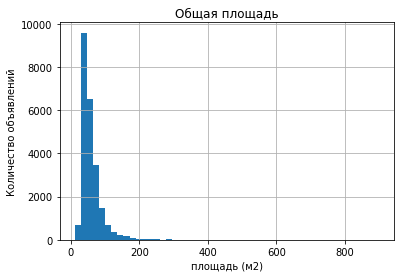

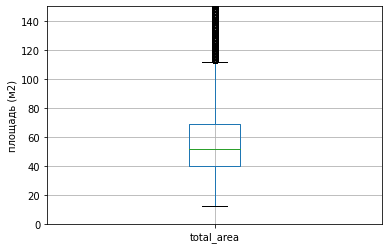

count    23565.000000
mean        60.095226
std         35.668758
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [39]:
df['total_area'].plot(kind='hist',bins=50,title='Общая площадь', grid=True)
plt.xlabel('площадь (м2)')
plt.ylabel('Количество объявлений')
plt.show()
df.boxplot(column='total_area')
plt.ylabel('площадь (м2)')
plt.ylim(0,150)
plt.show()
df['total_area'].describe()

In [40]:
# добавляем новый датафрейм с отсортированными данными, 
# сортировку буду проводить пошагово, после построения и изучения графиков 
df_1 = df.query('total_area <= 120')
len(df_1)

22520

Из диаграммы размаха видно что площадь больше 115 входит в число редких или аномальных. Взял небольшой запас и сделал срез до 120

## Количество объявлений сгруппированых по стоимости

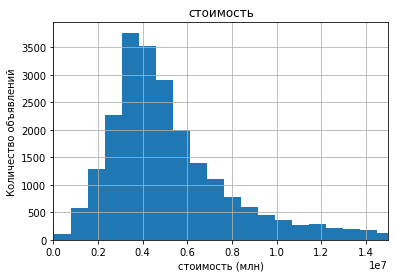

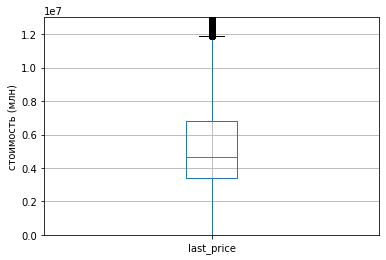

In [41]:
df['last_price'].plot(kind='hist', bins=1000, title="стоимость",grid=True)
plt.xlabel('стоимость (млн)')
plt.ylabel('Количество объявлений')
plt.xlim(0,15000000)
plt.show()
df.boxplot(column='last_price')
plt.ylabel('стоимость (млн)')
plt.ylim(0,13000000)
plt.show()

In [42]:
df_1 = df_1.query('last_price <= 12000000')
len(df_1)

21509

Из этой диаграммы видно, что нормальная стоимость до 12 млн. Сделал срез до 12 млн.

## Количество объявлений сгруппированых по комнатам

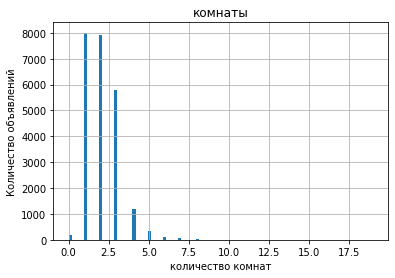

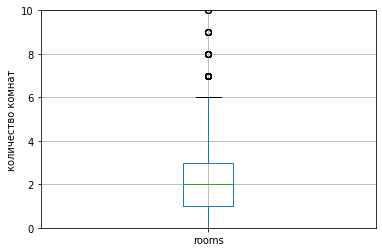

In [43]:
df['rooms'].plot(kind='hist', bins=100, title="комнаты",grid=True)
plt.xlabel('количество комнат')
plt.ylabel('Количество объявлений')
plt.show()
df.boxplot(column='rooms')
plt.ylabel('количество комнат')
plt.ylim(0,10)
plt.show()

In [44]:
df_1 = df_1.query('rooms <= 6')
len(df_1)

21509

Нормальное количество комнат не превышает 6.

## Количество объявлений сгруппированых по высоте потолка

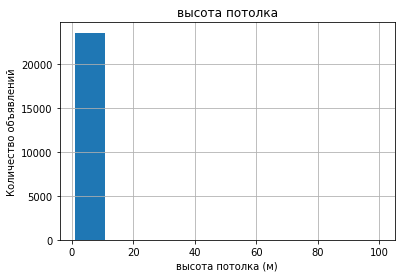

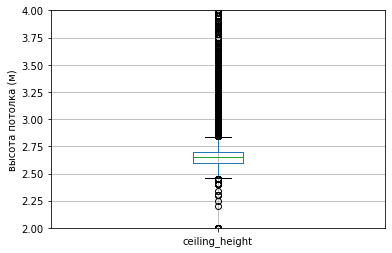

In [45]:
df['ceiling_height'].plot(kind='hist',bins=10, title="высота потолка",grid=True)
plt.xlabel('высота потолка (м)')
plt.ylabel('Количество объявлений')
plt.show()
df.boxplot(column='ceiling_height')
plt.ylabel('высота потолка (м)')
plt.ylim(2,4)
plt.show()

In [46]:
df_1 = df_1.query('ceiling_height > 2.4 and ceiling_height < 3')
len(df_1)

19755

Высоту потолков взял от 2,4 до 3, так как 3м это допустимая высота, которая часто встречается.

## Количество объявлений сгруппированых по времени продажи

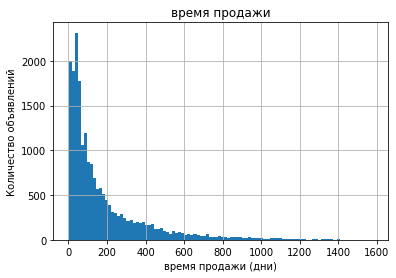

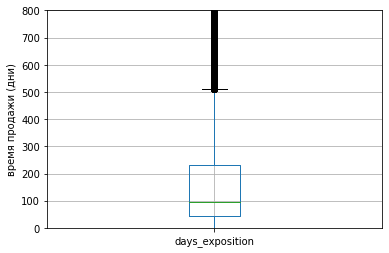

In [47]:
df['days_exposition'].plot(kind='hist',bins=100,title='время продажи',grid=True)
plt.xlabel('время продажи (дни)')
plt.ylabel('Количество объявлений')
plt.show()
df.boxplot(column='days_exposition')
plt.ylabel('время продажи (дни)')
plt.ylim(0,800)
plt.show()

In [48]:
# среднее
df['days_exposition'].mean()

180.7413945278023

In [49]:
# медиана
df['days_exposition'].median()

95.0

In [50]:
df_1 = df_1[(df['days_exposition'].isna()) | (df['days_exposition'] <=500)]
len(df_1)

18465

Нормальное время продажи по моему мнению от 50 до 150 дней.

In [51]:
'Размер таблицы от исходной: {:.2%}'. format(len(df_1)/len(df))

'Размер таблицы от исходной: 78.36%'

#  Факторы влияющие на стоимость

<AxesSubplot:>

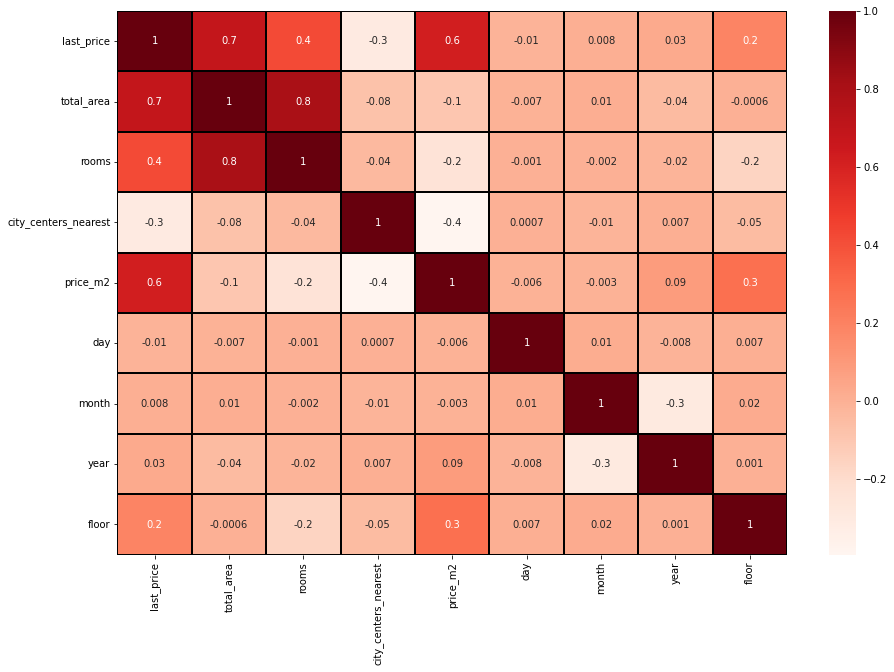

In [52]:
df_corr = df_1[['last_price', 'total_area', 'rooms', 'city_centers_nearest','price_m2','day', 'month', 'year', 'floor']]
plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot = True, fmt='.1g', cmap= 'Reds', linewidths=2, linecolor='black')

## Зависимость стоимости от площади

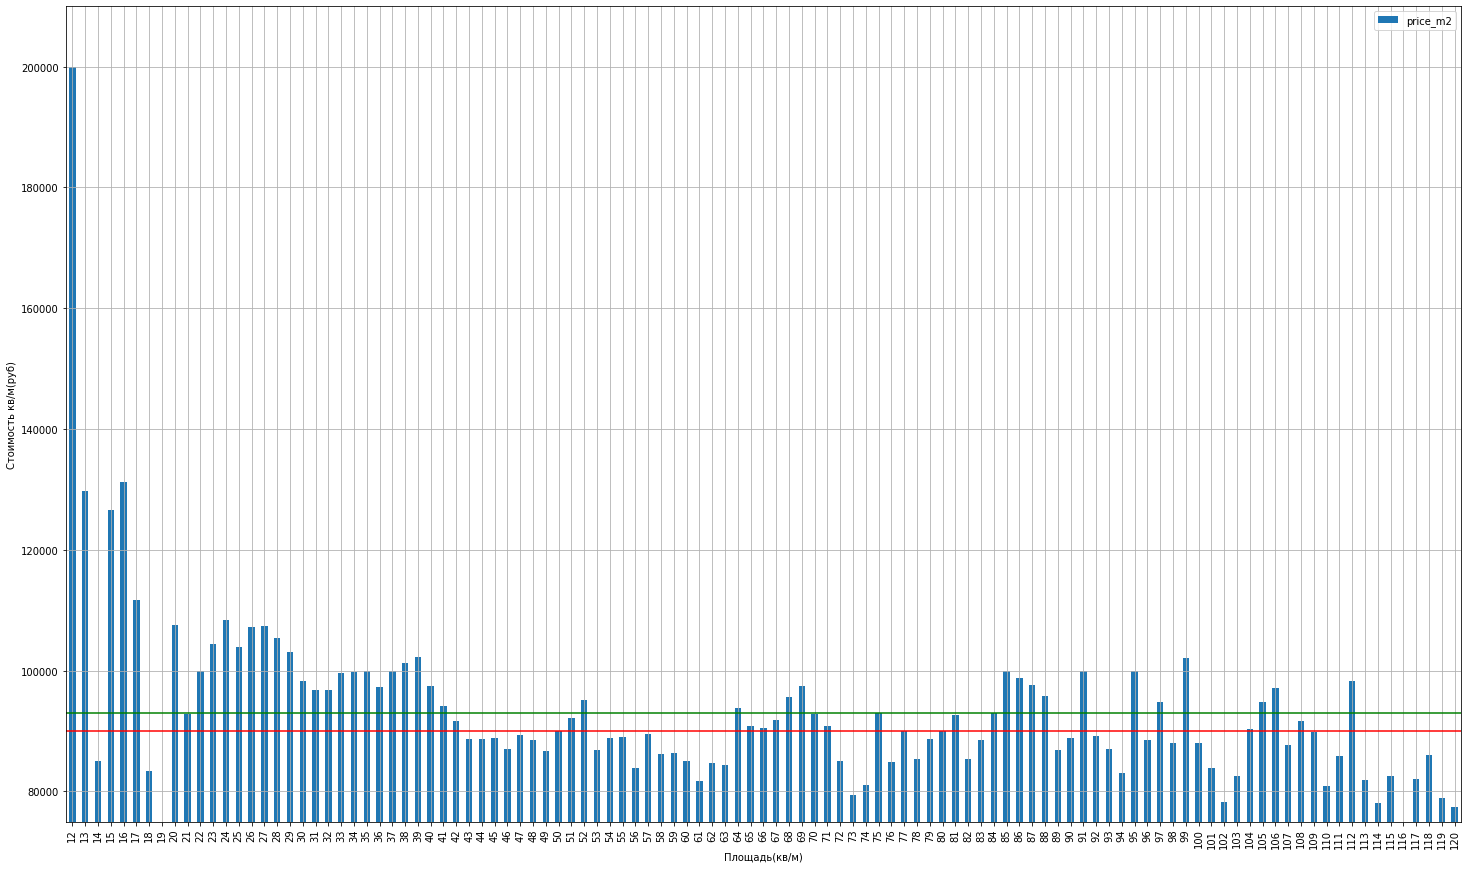

Медианная стоимсть км/м по городу:  90000
Средняя стоимость кв/м по городу:  93050


In [53]:
area_price = df_1.pivot_table(index='total_area', values='price_m2', aggfunc='median')
area_price.plot(kind='bar', figsize=(25,15), grid=True)
plt.axhline(y=area_price['price_m2'].median(), color='r')
plt.axhline(y=area_price['price_m2'].mean(), color='g')
plt.ylim(75000,)
plt.xlabel('Площадь(кв/м)')
plt.ylabel('Стоимость кв/м(руб)')
plt.show()
print('Медианная стоимсть км/м по городу: ', round(area_price['price_m2'].median()))
print('Средняя стоимость кв/м по городу: ', round(area_price['price_m2'].mean()))

##  Зависимость стоимости от количества комнат

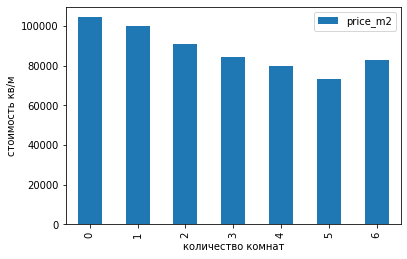

'Снижение стоимости кв/м при увеличении количества комнат: -5538.0'

______________________________________________________________________________________________________


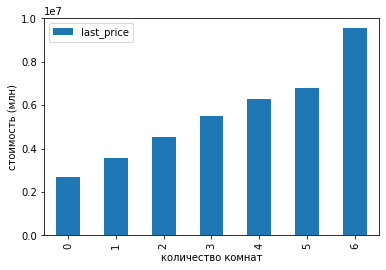

'Увеличение общей стоимости при увеличении количества комнат: 900000.0'

In [54]:
room_price_m2 = df_1.pivot_table(index='rooms', values='price_m2', aggfunc='median')
room_price_m2.plot(kind='bar',)
plt.xlabel('количество комнат')
plt.ylabel('стоимость кв/м')
plt.show()

display('Снижение стоимости кв/м при увеличении количества комнат: ' + str(room_price_m2['price_m2'].diff().median()))
print('______________________________________________________________________________________________________')

room_price = df_1.pivot_table(index='rooms', values='last_price', aggfunc='median')
room_price.plot(kind='bar',)
plt.xlabel('количество комнат')
plt.ylabel('стоимость (млн)')
plt.show()
display('Увеличение общей стоимости при увеличении количества комнат: ' + str(room_price['last_price'].diff().median()))

## Зависимость стоимости от удаленности от центра

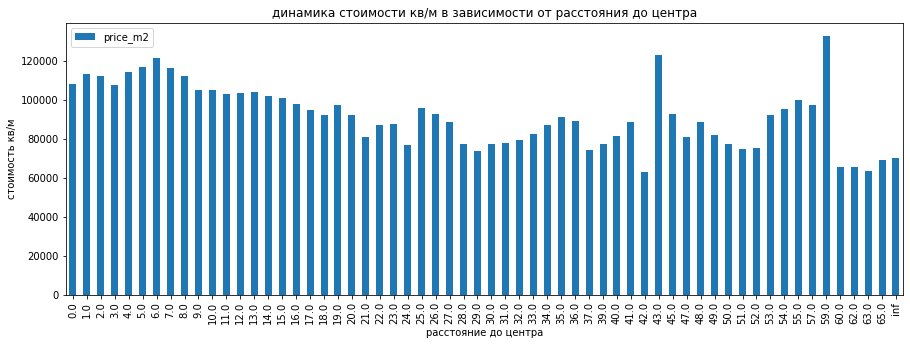

________________________________________________________________________________________________________________________


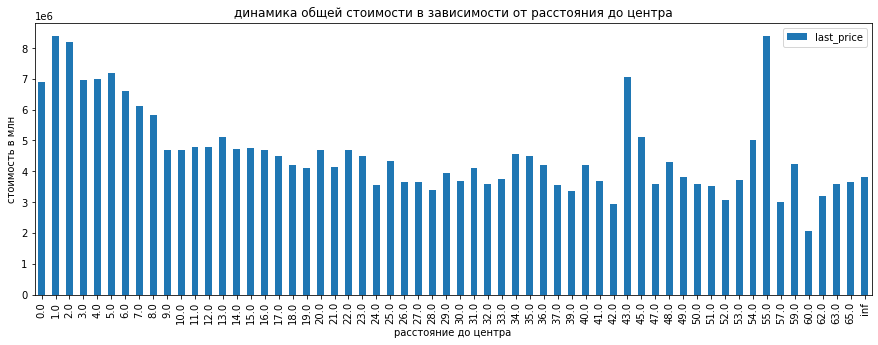

In [55]:
centr_price_m2 = df_1.pivot_table(index='centr_km', values='price_m2', aggfunc='median')
centr_price_m2.plot(kind='bar',figsize=(15,5), title='динамика стоимости кв/м в зависимости от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('стоимость кв/м')
plt.show()

print('__'*60)

centr_price = df_1.pivot_table(index='centr_km', values='last_price', aggfunc='median')
centr_price.plot(kind='bar', figsize=(15,5), title='динамика общей стоимости в зависимости от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('стоимость в млн')
plt.show()

## Зависимость стоимости от месяца

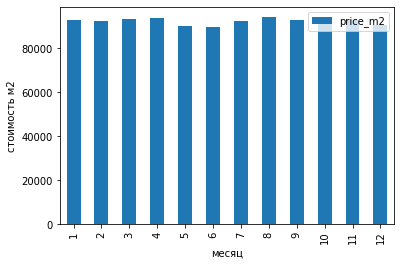

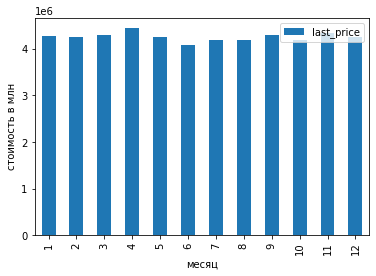

In [56]:
month_price = df_1.pivot_table(index='month', values='price_m2', aggfunc='median')
month_price.plot(kind='bar')
plt.xlabel('месяц')
plt.ylabel('стоимость м2')
plt.show()

month_price1 = df_1.pivot_table(index='month', values='last_price', aggfunc='median')
month_price1.plot(kind='bar')
plt.xlabel('месяц')
plt.ylabel('стоимость в млн')
plt.show()

## Зависимость стоимости от дня недели

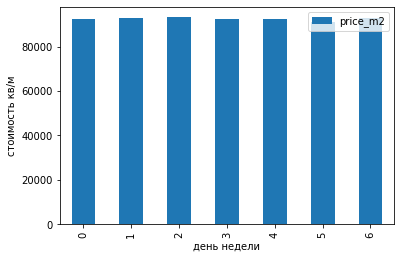

In [57]:
day_price = df_1.pivot_table(index='day', values='price_m2', aggfunc='median')
day_price.plot(kind='bar')
plt.xlabel('день недели')
plt.ylabel('стоимость кв/м')
plt.show()

## Зависимость стоимости от этажа

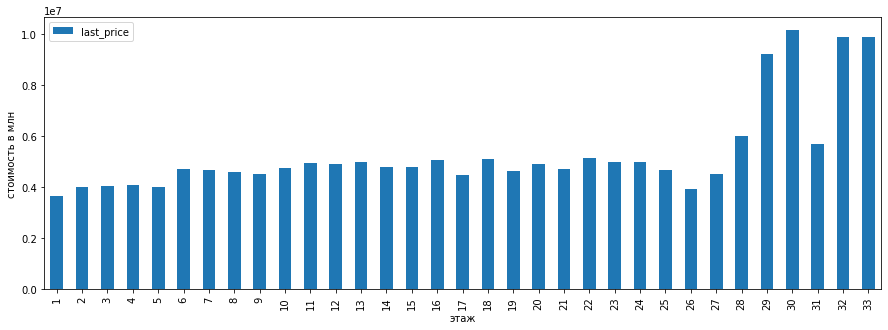

In [58]:
df_1.pivot_table(index='floor', values='last_price', aggfunc='median').plot(kind='bar', figsize=(15,5))
plt.xlabel('этаж')
plt.ylabel('стоимость в млн')
plt.show()

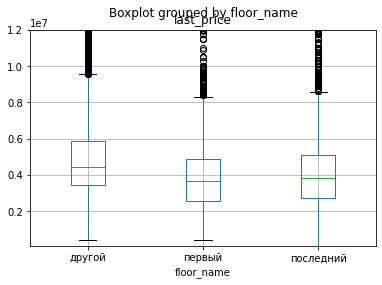

In [59]:
df_1.boxplot(column='last_price',by='floor_name')
plt.ylim(100000,12000000)
plt.show()

# Топ 10

In [60]:
# топ 10 населенных пунктов
top_10 = df_1.pivot_table(index='locality_name', values='price_m2', aggfunc=['count','mean']
                         ).astype(int)
top_10.columns=['count','mean_price_m2']

In [61]:
# Сортировка по количеству объявлений
top_10 = top_10.sort_values(by='count', ascending=False).head(10)
top_10

,count,mean_price_m2
locality_name,,
Санкт-Петербург,11467,105486
посёлок Мурино,482,86535
посёлок Шушары,413,78872
Всеволожск,352,67103
посёлок Парголово,311,90579
Колпино,301,75600
Пушкин,279,100140
деревня Кудрово,264,93176
Гатчина,262,68731


In [62]:
# Сортировка по стоимости М2
top_10.sort_values(by='mean_price_m2', ascending=False).head(10)

,count,mean_price_m2
locality_name,,
Санкт-Петербург,11467,105486
Пушкин,279,100140
деревня Кудрово,264,93176
посёлок Парголово,311,90579
посёлок Мурино,482,86535
посёлок Шушары,413,78872
Колпино,301,75600
Гатчина,262,68731
Всеволожск,352,67103


Самая высокая стоимость за м2  в Санкт-Петербурге, самая низкая в Выборге.

# Граница центра

In [63]:
#смотрим есть ли пропуски в расстоянии до центра
df_1[(df_1['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'].isna())].count()

total_images            32
last_price              32
total_area              32
first_day_exposition    32
rooms                   32
ceiling_height          32
floors_total            32
living_area             32
floor                   32
is_apartment            32
studio                  32
open_plan               32
kitchen_area            32
balcony                 32
locality_name           32
airports_nearest         0
city_centers_nearest     0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition         14
price_m2                32
floor_name              32
day                     32
month                   32
year                    32
total_living            32
total_kitchen           32
centr_km                 0
dtype: int64

In [64]:
# так как пропусков всего 33, считаю что их можно отфильтровать
df_1 = df_1[(df_1['locality_name'] == 'Санкт-Петербург') & (~df['city_centers_nearest'].isna())]

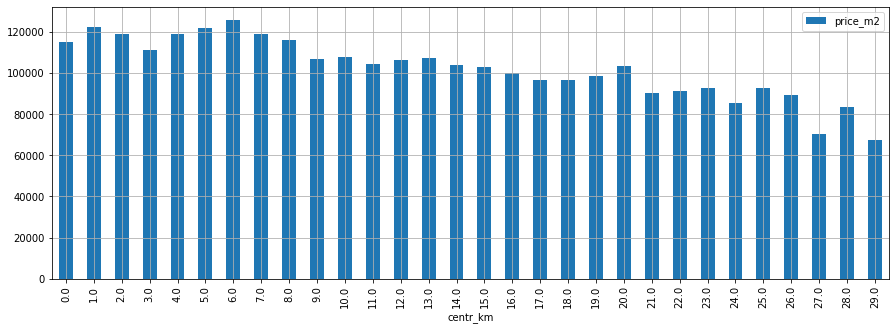

In [65]:
# Этот грфик из значений отфильтрованного датафрейма
price_km = df_1.pivot_table(index='centr_km', values='price_m2', aggfunc='mean').round()
price_km.plot(kind='bar',grid=True, figsize=[15,5])
plt.show()

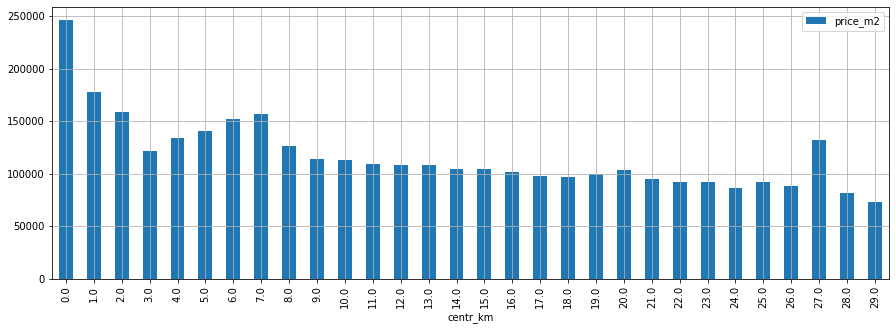

In [66]:
#Этот график из первоначального датафрейма с выбором локации- Санкт-Петербург
price_k = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(index='centr_km', 
                                                                   values='price_m2', 
                                                                   aggfunc='mean').round()

price_k.plot(kind='bar',grid=True, figsize=[15,5])
plt.show()

Из графика выше следует что центр обозначается границей 7 км, так как на 8 км идет спад цены после подъема. Скачки стоимости до 7 км предполагаю зависят от локаций. проседание стоимости на 3 км это промзона.

In [67]:
# делаем срез из ранее полученных данных
df_centr = df.query('locality_name == "Санкт-Петербург" & centr_km < 8')

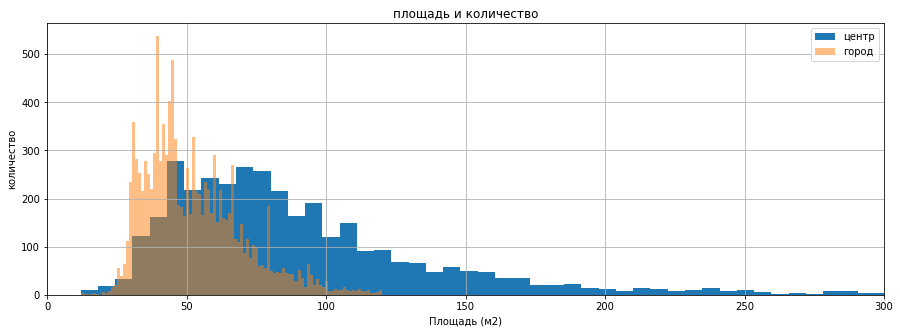

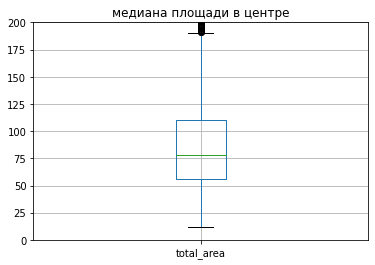

In [68]:
# соотношение площадей квартир в ценре и в общем по городу
df_centr['total_area'].plot(kind='hist',bins=100, grid=True, figsize= [15,5], label='центр')
df_1['total_area'].plot(kind='hist',
                        bins=100,
                        title='площадь и количество', 
                        grid=True, figsize= [15,5], 
                        alpha=0.5, 
                        label='город'
                       )
plt.xlim(0,300)
plt.xlabel('Площадь (м2)')
plt.ylabel('количество')
plt.legend()
plt.show()
df_centr.boxplot(column='total_area')
plt.title('медиана площади в центре')
plt.ylim(0,200)
plt.show()

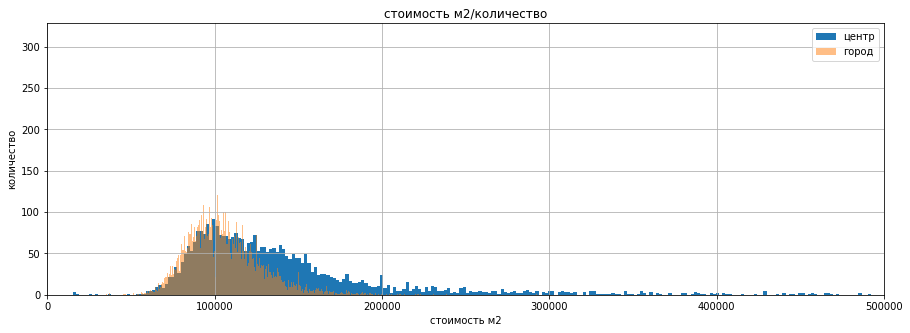

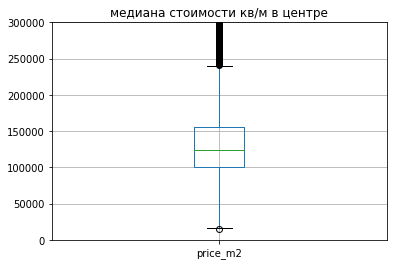

In [69]:
# соотношение стоимостей м2 в ценре и по городу
df_centr['price_m2'].plot(kind='hist',bins=1000,title='стоимость м2/количество', grid=True, figsize= [15,5], label='центр')
df_1['price_m2'].plot(kind='hist',bins=1000, grid=True, figsize= [15,5], alpha=0.5, label='город')
plt.xlabel('стоимость м2')
plt.ylabel('количество')
plt.xlim(0,500000)
plt.legend()
plt.show()
df_centr.boxplot(column='price_m2')
plt.ylim(0,300000)
plt.title('медиана стоимости кв/м в центре')
plt.show()

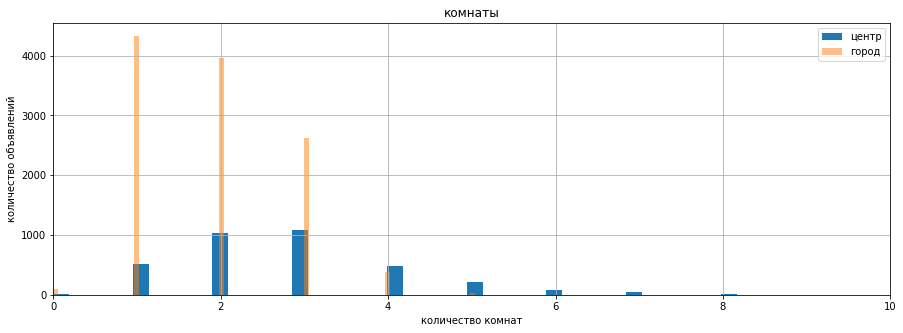

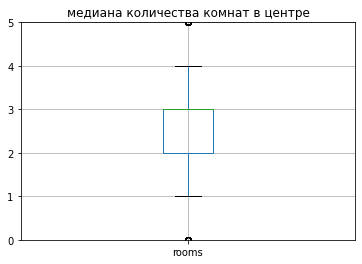

In [70]:
# количество комнат в центре и по городу
df_centr['rooms'].plot(kind='hist',bins=100, grid=True, figsize= [15,5], label='центр')
df_1['rooms'].plot(kind='hist',bins=100,title='комнаты', grid=True, figsize= [15,5], alpha=0.5, label='город')
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')
plt.xlim(0,10)
plt.legend()
plt.show()
df_centr.boxplot(column='rooms')
plt.ylim(0,5)
plt.title('медиана количества комнат в центре')
plt.show()

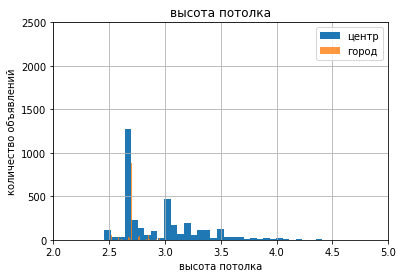

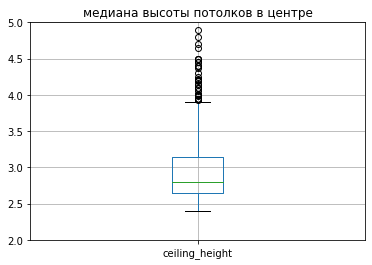

In [71]:
# высота потолка в ценре и по городу
df_centr['ceiling_height'].plot(kind='hist',bins=500,grid=True, label='центр')
df_1['ceiling_height'].plot(kind='hist',bins=500, title="высота потолка",grid=True, alpha=0.8, label='город')
plt.xlabel('высота потолка')
plt.ylabel('количество объявлений')
plt.xlim(2,5)
plt.ylim(0,2500)
plt.legend()
plt.show()
df_centr.boxplot(column='ceiling_height')
plt.ylim(2,5)
plt.title('медиана высоты потолков в центре')
plt.show()

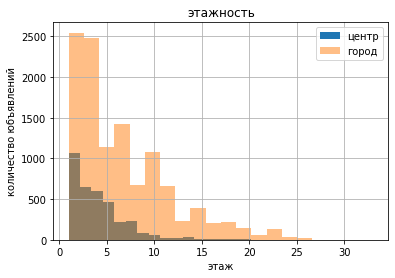

In [72]:
# этажность в центре и по городу
df_centr['floor'].plot(kind='hist',bins=20,grid=True, label='центр')
df_1['floor'].plot(kind='hist',bins=20, title="этажность",grid=True, alpha=0.5, label='город')
plt.xlabel('этаж')
plt.ylabel('количество юбъявлений')
plt.legend()
plt.show()

In [73]:
df_corr_centr = df_centr[['last_price', 'total_area', 'rooms', 'city_centers_nearest','price_m2','day', 'month', 'year']]
df_corr_centr.corr().round(2)

,last_price,total_area,rooms,city_centers_nearest,price_m2,day,month,year
last_price,1.00,0.61,0.31,-0.04,0.80,0.03,-0.01,-0.05
total_area,0.61,1.00,0.73,-0.09,0.24,0.01,-0.02,-0.08
rooms,0.31,0.73,1.00,-0.17,-0.00,-0.01,-0.03,-0.07
city_centers_nearest,-0.04,-0.09,-0.17,1.00,-0.02,0.01,0.00,0.03
price_m2,0.80,0.24,-0.00,-0.02,1.00,0.02,-0.02,0.01
day,0.03,0.01,-0.01,0.01,0.02,1.00,0.02,0.00
month,-0.01,-0.02,-0.03,0.00,-0.02,0.02,1.00,-0.24
year,-0.05,-0.08,-0.07,0.03,0.01,0.00,-0.24,1.00


In [74]:
print('медиана стоимости кв/м в центре:', df_centr['price_m2'].median())

медиана стоимости кв/м в центре: 123831.0


# Общий вывод

- Из представленых выше графиков видно, что квартиры в центре имеют бОльшую площадь, что в общем предсказуемо и достигают 150+ км\м. Квартиры в общем по городу с среднем от30 до 75 кв\м.
- Примерно похожая ситуация и со стоимостью кв\м. Квартиры в центре имеют более высокую стоимость за кв\м, и общую стоимость.
- В центре продается больше 3х комнатных квартир, в общем в городе больше однокомнатных. Это объясняется временем постройки, в центре преобладают здания старой постройки.
- Высота потолков в центре разнится от 2,5м до 4, что объясняется так же временем постройки, в то время как в городе преобладает высота 2,5м.
- Количество квартир на певых этажах в общем по городу больше из за того, что количественно объявлений больше. Чем выше этажность в центре, тем меньше объявлений, что логично. Количество этажей в центре редко превышает 10, в  свою очередь в общем по городу квартиры расположенные на 10 и выше этажах, достаточно часты.

- **Средняя стоимость кв/м по городу составляет 102 тыс., средняя стоимость кв/м в ценре- 123тыс. Есть небольшая не явная зависимость стоимости кв/м от общей площади, чем больше квартира, тем ниже стоимость кв/м. Но общая стоимость соответственно растет.**
- **При увеличении количества комнат средняя стоимость кв/м уменьшается в среднем на 7 тыс, а общая стоимость увеличивается в среднем на 1 млн** ( тут больше подходят проценты, но я не смог найти как это сделать методом, буду благодарен за подсказку)
- **Стоимость кв/м на первом этаже в среднем меньше на 6500, чем на последнем. Примерно такая же разница в стоимости между последним этажом и остальными. Разница стоимости кв/м между первым и остальными этажами(кроме последнего) может достигать 13000**(тут также лучше подошли бы проценты)
- **Стоимость кв/м при удалении от центра уменьшается примерно на 1 тыс/1км**